In [1]:
import matplotlib.image as mpimg
import os

import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
from glob import glob
import cv2
#import zipfile
from PIL import Image
  
from keras.callbacks import EarlyStopping
#from keras.preprocessing import image_dataset_from_directory
#from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils.np_utils import to_categorical
from keras.utils import image_dataset_from_directory
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.models import Sequential
from keras import layers
from tensorflow import keras
#from layers.experimental.preprocessing import Rescaling
from sklearn.model_selection import train_test_split
#from zipfile import ZipFile
  
import warnings
warnings.filterwarnings('ignore')

Loading the dataset by entzipping

In [2]:
# Extracting the compressed dataset.
#data_path = 'streetsigns.zip' 
#with ZipFile(data_path, 'r') as zip	: zip.extractall()

# Data Exploration / Visualization

In [3]:
#accesing path for dataset
data_path='c:\\ZHAW\\23FS\\KI\\DataForProject'
train_path='c:\\ZHAW\\23FS\\KI\\DataForProject\\Train'

#Variables for resizing
IMG_HEIGHT = 30
IMG_WIDTH = 30
channels = 3

#Getting Total Nr of Classes from Train Folder
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

## 1. Showing number of images per subfolder/class

Text(0, 0.5, 'Number of images')

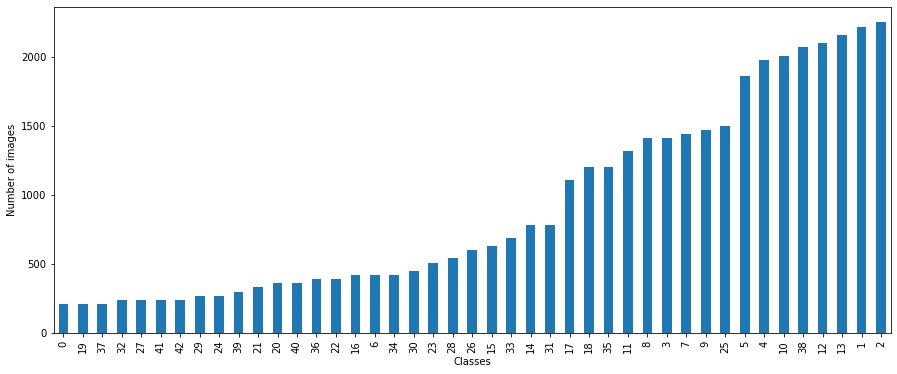

In [4]:
# number of images in each class
data_dic = {}
for folder in os.listdir(train_path):
    data_dic[folder] = len(os.listdir(train_path + '/' + folder))

data_df= pd.Series(data_dic)
plt.figure(figsize = (15, 6))
data_df.sort_values().plot(kind = 'bar')
plt.xlabel('Classes')
plt.ylabel('Number of images')

## 2. Labeling the data

In [5]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

## 3. Showing number of images with labels

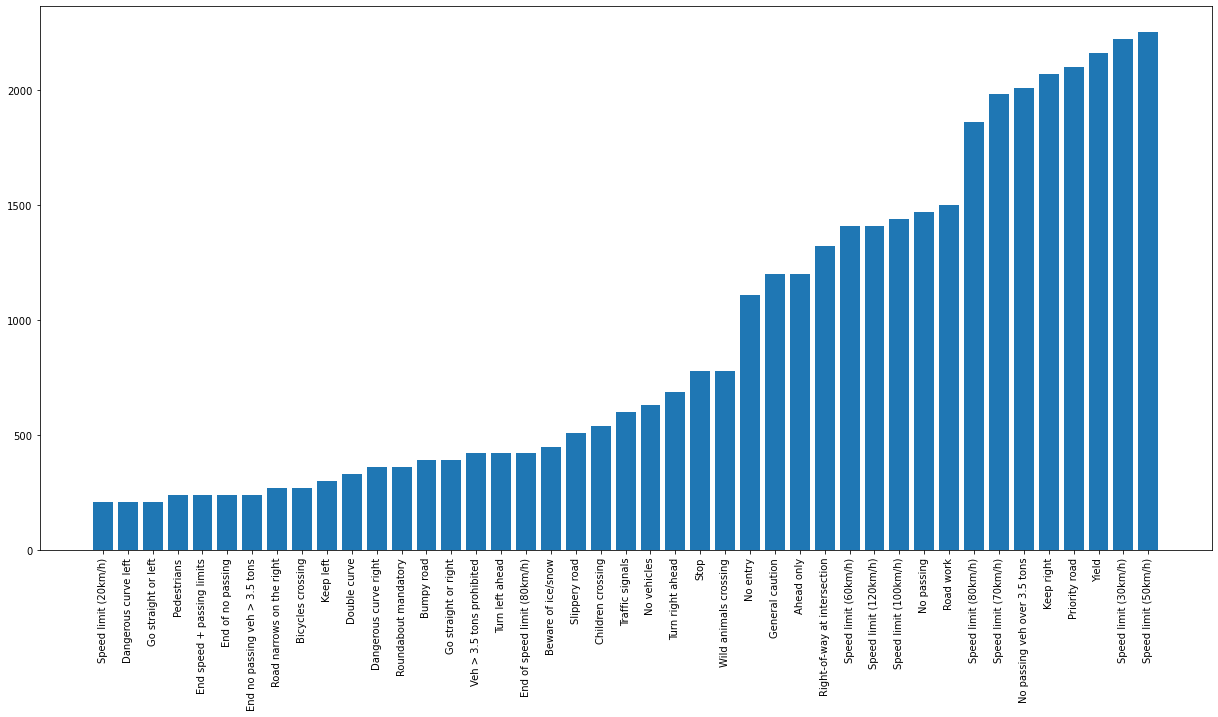

In [6]:
folders = os.listdir(train_path)

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])

# Sorting the dataset on the basis of number of images in each class
sorted_indices = sorted(range(len(train_number)), key=lambda i: train_number[i])
train_number = [train_number[i] for i in sorted_indices]
class_num = [class_num[i] for i in sorted_indices]

# Plotting the number of images in each class
plt.figure(figsize=(21, 10))
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

## 4. Visualizing random images

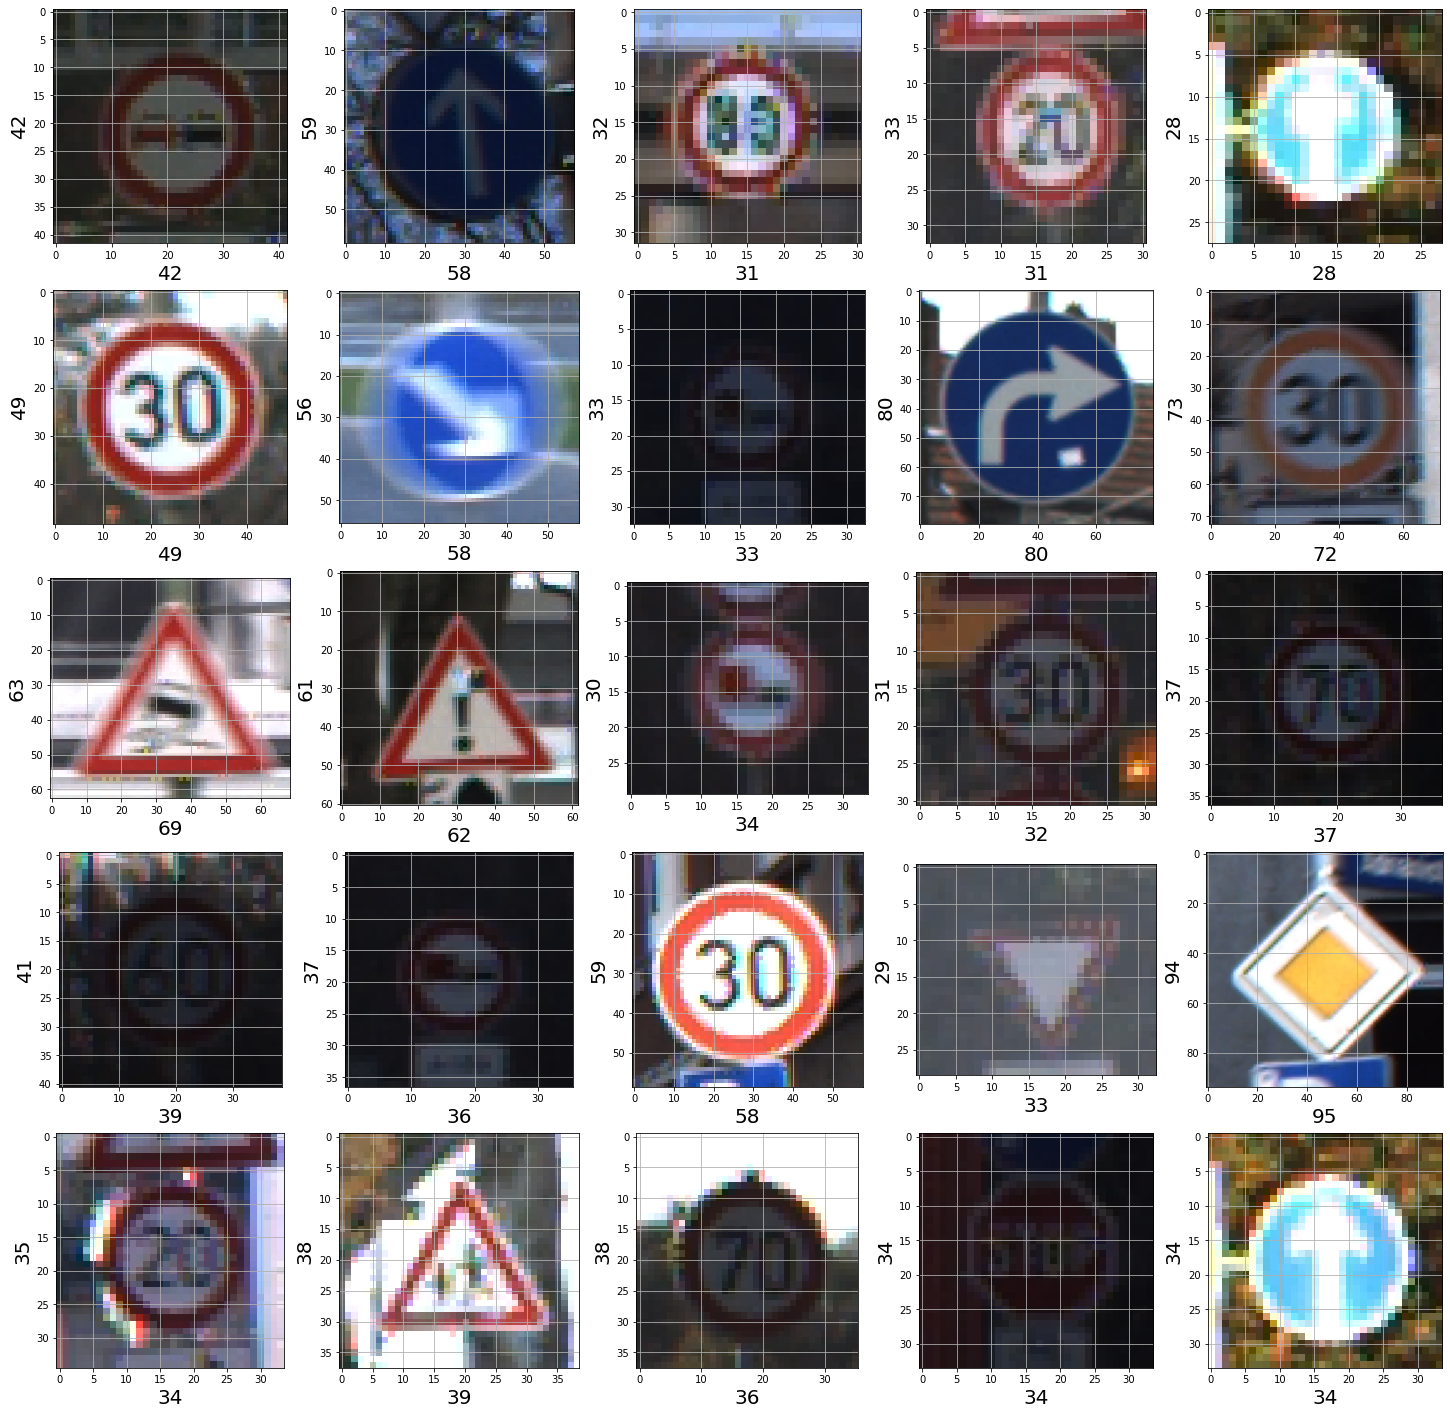

In [7]:
# Visualizing 25 random images from test data
import random
from matplotlib.image import imread

test = pd.read_csv(data_path + '\\Test.csv')
imgs = test["Path"].values

plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_img_path = data_path + '\\' + random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.grid(b=None)
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image

# Collecting the training data

In [8]:
image_data = []
image_labels = []

for i in range(NUM_CATEGORIES):
    path = train_path + "\\" + str(i)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '\\' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            #resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
            image_data.append(np.array(image_fromarray))
            image_labels.append(i)
        except:
            print("Error in " + img)

# Changing the list to numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)
#####fasdfa,sdfm,asö

(39209,) (39209,)


# Splitting the data into train and validation set

Splitting data into 70/30. 30% for validation. Data is shuffled.

In [9]:
X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.3, random_state=42, shuffle=True)

(X_test, y_test) = (image_data, image_labels)
#X_train = X_train/255 
#X_val = X_val/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)
print("X_test.shape", X_test.shape)
print("y_test.shape", y_test.shape)

X_train[:10]

X_train.shape (27446,)
X_valid.shape (11763,)
y_train.shape (27446,)
y_valid.shape (11763,)
X_test.shape (39209,)
y_test.shape (39209,)


array([array([[[27, 28, 36],
               [28, 29, 37],
               [25, 26, 34],
               ...,
               [20, 21, 23],
               [22, 23, 26],
               [24, 25, 26]],

              [[32, 33, 41],
               [29, 30, 38],
               [26, 27, 35],
               ...,
               [23, 24, 25],
               [22, 23, 24],
               [23, 24, 25]],

              [[28, 30, 38],
               [30, 32, 40],
               [28, 29, 37],
               ...,
               [26, 26, 26],
               [26, 26, 26],
               [26, 27, 28]],

              ...,

              [[23, 25, 29],
               [23, 24, 27],
               [24, 25, 27],
               ...,
               [21, 23, 27],
               [22, 23, 28],
               [22, 22, 26]],

              [[22, 23, 26],
               [21, 24, 27],
               [24, 26, 28],
               ...,
               [22, 24, 26],
               [21, 23, 26],
               [20, 22, 25]],



# One Hot Encoding the labels

In [10]:
y_train = keras.utils.to_categorical(y_train, NUM_CATEGORIES)
y_val = keras.utils.to_categorical(y_val, NUM_CATEGORIES)

print(y_train.shape)
print(y_val.shape)

(27446, 43)
(11763, 43)


# Creating first model

In [11]:
#Creating resize and rescale layer
IMG_SIZE = 30

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])

In [12]:
#Creating data augementation layers
data_augmentation = tf.keras.Sequential([
  layers.RandomContrast(0.5),
  layers.RandomBrightness(0.5),
  layers.RandomZoom(.5, .2)
])

In [13]:
input_shape = (30, 30, 3) #30x30 Images in black/white, to have RGB 30, 30, 3


model1 = tf.keras.Sequential([
# input layer
tf.keras.Input(shape=input_shape),

#Preprocessing layers
resize_and_rescale,

#Data Augmentation layers
data_augmentation,

# first convolution layer
tf.keras.layers.Conv2D(32, kernel_size=3, activation="relu"),
tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
# second convolution layer
tf.keras.layers.Conv2D(64, kernel_size=3, activation="relu"),
tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
# fully connected classifier
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(1024, activation="relu"),
tf.keras.layers.BatchNormalization(),
tf.keras.layers.Dense(NUM_CATEGORIES, activation="softmax")
])

In [14]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 30, 30, 3)         0         
                                                                 
 sequential_1 (Sequential)   (None, 30, 30, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                  

In [15]:
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
history = model1.fit(X_train, y_train, epochs=15, validation_split=0.2)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).